# Understanding Customer Sentiments Towards Airlines 

By Hannah Koschmeder, Sophia Yoo, Bryan Yan

## Introduction

blah blah flights blah blah

In [101]:
import numpy as np
import pandas as pd
import math
import csv
from textblob import TextBlob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Getting the Data

Although Twitter has an official API, it is annoying to work with and has many limitations. Because of this, we will be using an official scraper, which can be found [here](https://github.com/taspinar/twitterscraper). Run the following commands to retrieve the results that we will be using:

`pip install twitterscraper`

` twitterscraper "to:united" -o united.csv -l 1000 -c`

We chose to look at the top 7 airlines within North America.

In [144]:
airline_df = pd.DataFrame()
airlines = ['alaska', 'american', 'delta', 'jetblue', 'southwest', 'spirit', 'united']
filenames = ["data/alaska.csv", "data/american.csv",
             "data/delta.csv", "data/jetblue.csv",
             "data/southwest.csv", "data/spirit.csv",
             "data/united.csv"]

for filename in filenames:
    file = pd.read_csv(filename)
    file['airline'] = filename.split('/')[1][:-4]
    airline_df = airline_df.append(file)

airline_df = airline_df.drop(['url','html'], axis=1)
airline_df.head(5)

,user,fullname,tweet-id,timestamp,likes,replies,retweets,text,airline
0,rkdasaka,ravi dasaka,841431041906634753,2017-03-13 23:29:28,0,0,0,@AlaskaAir #MostWestCoast,alaska
1,KyleCDavidson,kyle davidson,841428140383588352,2017-03-13 23:17:56,0,0,0,@AlaskaAir 3rd cancelled flight of my vacay & ...,alaska
2,mr_deals805,o,841411760015859714,2017-03-13 22:12:50,0,0,0,people from kansas city...not people from san ...,alaska
3,lilcadet101,Cadet,841409697089486849,2017-03-13 22:04:39,0,0,0,@AlaskaAir I'll take an $800 voucher to give u...,alaska
4,karenjen75,MomOf3Boys,841408802964484096,2017-03-13 22:01:05,0,0,0,"@AlaskaAir - Hands down, the BEST airline in c...",alaska


To get the sentiments of every tweet, we will be using a library called [TextBlob](http://textblob.readthedocs.io/en/dev/index.html).

In [145]:
def get_sentiment(text):
    tb = TextBlob(str(text))
    return tb

def getClassification(polarity):
    if (polarity < 0): return 'negative'
    elif (polarity > 0): return 'positive'
    else: return 'neutral'

In [146]:
airline_df['sentiment_polarity'] = airline_df['text'].apply(lambda x: get_sentiment(x).sentiment.polarity)
airline_df['sentiment'] = airline_df['sentiment_polarity'].apply(lambda x: getClassification(x))
airline_df.head(10)

,user,fullname,tweet-id,timestamp,likes,replies,retweets,text,airline,sentiment_polarity,sentiment
0,rkdasaka,ravi dasaka,841431041906634753,2017-03-13 23:29:28,0,0,0,@AlaskaAir #MostWestCoast,alaska,0.000000,neutral
1,KyleCDavidson,kyle davidson,841428140383588352,2017-03-13 23:17:56,0,0,0,@AlaskaAir 3rd cancelled flight of my vacay & ...,alaska,-0.375000,negative
2,mr_deals805,o,841411760015859714,2017-03-13 22:12:50,0,0,0,people from kansas city...not people from san ...,alaska,0.000000,neutral
3,lilcadet101,Cadet,841409697089486849,2017-03-13 22:04:39,0,0,0,@AlaskaAir I'll take an $800 voucher to give u...,alaska,0.000000,neutral
4,karenjen75,MomOf3Boys,841408802964484096,2017-03-13 22:01:05,0,0,0,"@AlaskaAir - Hands down, the BEST airline in c...",alaska,0.422222,positive
5,jaustinw,J. Austin Wulliman,841406203695587328,2017-03-13 21:50:46,1,1,0,".@AlaskaAir @jackquartet wait, how could you t...",alaska,0.000000,neutral
6,TheeBenReed,Benjamin Reed,841404048699973632,2017-03-13 21:42:12,0,1,0,@AlaskaAir first time flying @AlaskaAir and a...,alaska,0.250000,positive
7,michaelnoll11,Michael Noll,841395450221490176,2017-03-13 21:08:02,0,1,0,@AlaskaAir Upcoming VX flight (I'm elevate sil...,alaska,0.000000,neutral
8,nielsenc,C Nielsen,841395144528019456,2017-03-13 21:06:49,0,1,0,@AlaskaAir @SkyWestAirlines why does an employ...,alaska,0.157143,positive
9,badnewscaitie,caitie,841394528909172737,2017-03-13 21:04:22,0,1,0,@AlaskaAir This is a six and a half hour fligh...,alaska,-0.166667,negative


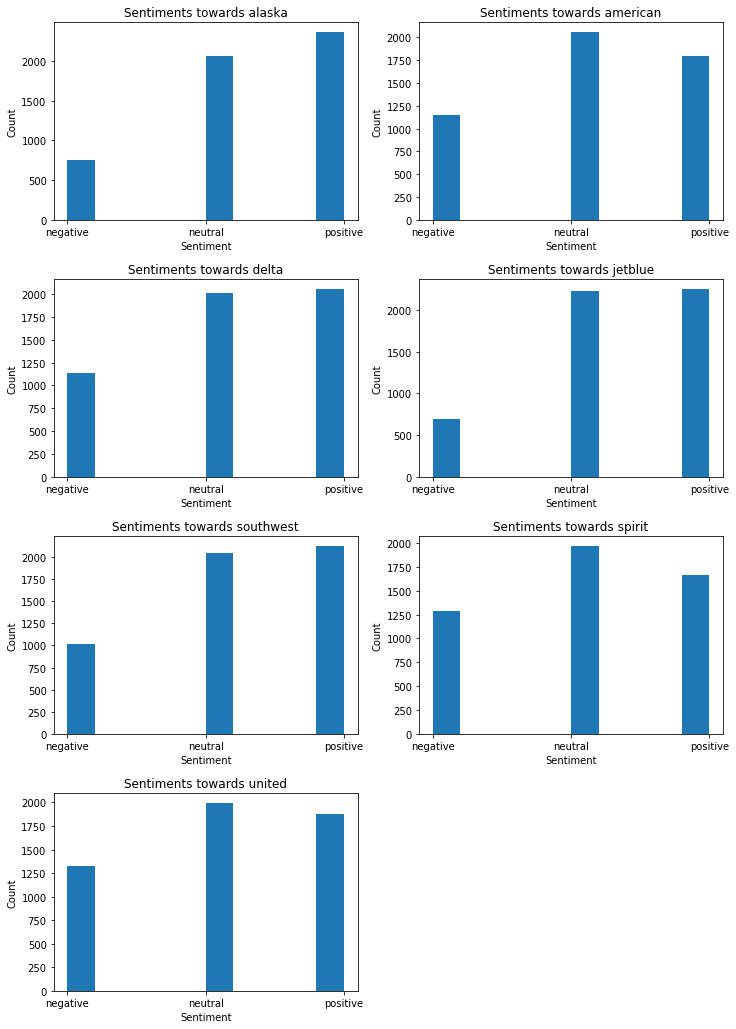

In [164]:
def plotHistogram(df, airline, name, xlabel):
    subset = df[df['airline'] == airline]
    allValues = subset[name]
    plt.hist(allValues)
    plt.title('Sentiments towards ' + airline)
    plt.xlabel(xlabel)
    plt.ylabel('Count')

plt.figure(figsize=(12,32))
name = 'sentiment'
label = 'Sentiment'
for index, airline in enumerate(airlines):
    plt.subplot(7, 2, index+1)
    plt.subplots_adjust(hspace = 0.3)
    plotHistogram(airline_df, airline, name, label)